In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler,RobustScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df=pd.read_csv("C:\\Users\\USER\\DA\\Data Sets\\PROJECT DATASETS\\Tomato.csv")
df

,Date,Unit,Minimum,Maximum,Average,Market
0,2013-06-16,Kg,26,32,29.0,Tomato
1,2013-06-17,Kg,20,25,22.5,Tomato
2,2013-06-18,Kg,22,26,24.0,Tomato
3,2013-06-19,Kg,24,28,26.0,Tomato
4,2013-06-20,Kg,22,26,24.0,Tomato
...,...,...,...,...,...,...
2736,2021-05-09,Kg,10,15,12.5,Tomato
2737,2021-05-10,Kg,10,15,12.5,Tomato
2738,2021-05-11,Kg,10,15,12.5,Tomato
2739,2021-05-12,Kg,30,35,32.5,Tomato


In [4]:
df.nunique()

Date       2741
Unit          1
Minimum      51
Maximum      57
Average     116
Market        1
dtype: int64

In [6]:
df.drop(columns=["Unit","Market"],inplace=True)

In [7]:
df

,Date,Minimum,Maximum,Average
0,2013-06-16,26,32,29.0
1,2013-06-17,20,25,22.5
2,2013-06-18,22,26,24.0
3,2013-06-19,24,28,26.0
4,2013-06-20,22,26,24.0
...,...,...,...,...
2736,2021-05-09,10,15,12.5
2737,2021-05-10,10,15,12.5
2738,2021-05-11,10,15,12.5
2739,2021-05-12,30,35,32.5


In [8]:
le=LabelEncoder()

In [9]:
df["Date"]=le.fit_transform(df["Date"])


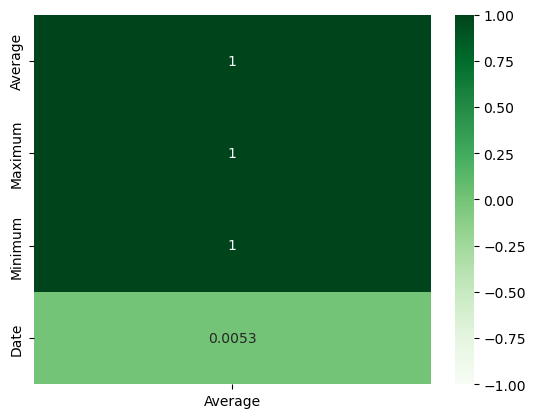

In [10]:
sns.heatmap(df.corr()[["Average"]].sort_values(by="Average", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Greens");

In [11]:
x=df[["Date","Minimum","Maximum"]].values
y=df[["Average"]].values

In [12]:
sc=StandardScaler()

In [13]:
x=sc.fit_transform(x)

In [14]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor()
}

In [15]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  7.890466767948964e-15
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  1.0211327425863808
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.0037776304714475205
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  0.3017334668403954
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  0.21692156393501452
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  1.2782628646359147
***************************************

In [16]:
r=Ridge()

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [19]:
r.fit(x_train, y_train)

Ridge()

In [20]:
print("model trained with {}".format(r))
training_score = r.score(x_train, y_train)*100
testing_score = r.score(x_test, y_test)*100
score = r2_score(y_test, r.predict(x_test))*100
mae = mean_absolute_error(y_test, r.predict(x_test))
mse = mean_squared_error(y_test, r.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with Ridge()
r2score:  99.9999940049846
training_score:  99.99999391897258
testing_score:  99.9999940049846
mae:  0.0035961034727847825
mse:  1.92965140539314e-05
rmse_test:  0.00439277976387747


In [22]:
y_pred = r.predict(x)

In [23]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,29.0,29.002080
1,22.5,22.504009
2,24.0,24.004234
3,26.0,26.003809
4,24.0,24.004234
...,...,...
2736,12.5,12.506053
2737,12.5,12.506053
2738,12.5,12.506053
2739,32.5,32.501795


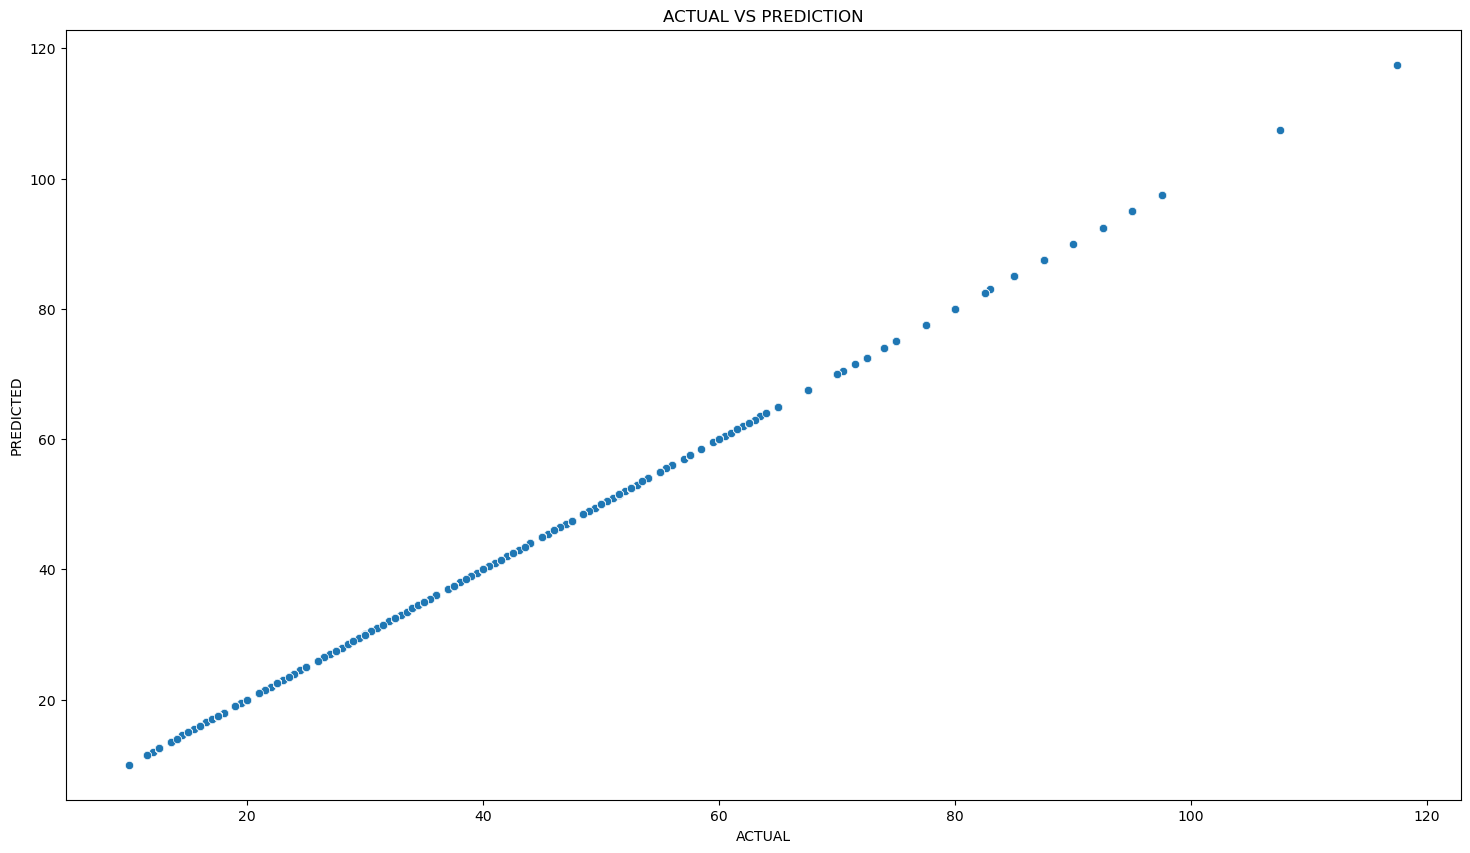

In [24]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()